In [9]:
# import packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
import sklearn
import nltk
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud, ImageColorGenerator
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [10]:
# import depression detection csv
df = pd.read_csv (r'C://Users//lvlip//Documents//BCSI Sem 6//FYP 4202//CSV//depression_detection.csv', engine='python')
df.head()

,username,datetime,tweet,cleaned_tweet,target,tweet_compound,fear,anger,anticipation,trust,surprise,positive,negative,sadness,disgust,joy,second/thirdperson,firstperson,sadness/loneliness,suicidal,primarysupport,troubleconcentrate,worthlessness/guilt,housing,disturbedsleep,occupational,fatigue/lossenergy,weight/appetite,agitation/retardation,topic
0,robertevans97,16/12/2021 14:27,@arielhelwani @DustinPoirier @NateDiaz209 Big ...,big fight dustin want prove point nate,normal,-0.3182,0.25,0.25,0.0000,0.0000,0.0000,0.2500,0.25,0.0,0.0,0.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,flintmorris,16/12/2021 14:27,@ItsRyanGonzales @100Thieves @RabidDoh @thundo...,they choose one best naruto opening song big,normal,0.6369,0.00,0.00,0.0000,0.0000,0.0000,0.0000,0.00,0.0,0.0,0.0000,1,0,0,0,0,0,0,0,0,0,0,0,0,4
2,chardinite,16/12/2021 14:27,@Tinkzorg Gen Z can't wield the mandate of hea...,gen z not wield mandate heaven confirm,normal,0.5106,0.00,0.00,0.0000,0.0000,0.0000,0.0000,0.00,0.0,0.0,0.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,5
3,ghobubo,16/12/2021 14:27,@JortsTheCat has his own account and 20K follo...,his account follower sweet potato,normal,0.4588,0.00,0.00,0.1429,0.4286,0.1429,0.1429,0.00,0.0,0.0,0.1429,1,0,0,0,0,0,0,0,0,0,0,0,0,7
4,mdarahimkhan2,16/12/2021 14:27,@BitKeepOS @NEARProtocol This is a really grea...,really great excellent project thank you oppor...,normal,0.9604,0.00,0.00,0.2500,0.1875,0.0625,0.3125,0.00,0.0,0.0,0.1875,1,1,0,0,0,0,0,0,0,0,0,0,0,3


In [11]:
# check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10547 entries, 0 to 10546
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   username               10547 non-null  object 
 1   datetime               10547 non-null  object 
 2   tweet                  10547 non-null  object 
 3   cleaned_tweet          10547 non-null  object 
 4   target                 10547 non-null  object 
 5   tweet_compound         10547 non-null  float64
 6   fear                   10547 non-null  float64
 7   anger                  10547 non-null  float64
 8   anticipation           10547 non-null  float64
 9   trust                  10547 non-null  float64
 10  surprise               10547 non-null  float64
 11  positive               10547 non-null  float64
 12  negative               10547 non-null  float64
 13  sadness                10547 non-null  float64
 14  disgust                10547 non-null  float64
 15  jo

In [12]:
# check the total number of null value
df.isnull().sum()

username                 0
datetime                 0
tweet                    0
cleaned_tweet            0
target                   0
tweet_compound           0
fear                     0
anger                    0
anticipation             0
trust                    0
surprise                 0
positive                 0
negative                 0
sadness                  0
disgust                  0
joy                      0
second/thirdperson       0
firstperson              0
sadness/loneliness       0
suicidal                 0
primarysupport           0
troubleconcentrate       0
worthlessness/guilt      0
housing                  0
disturbedsleep           0
occupational             0
fatigue/lossenergy       0
weight/appetite          0
agitation/retardation    0
topic                    0
dtype: int64

In [13]:
# check the description
pd.set_option('display.max.columns', None)
pd.set_option('display.precision', 4)
df.describe()

,tweet_compound,fear,anger,anticipation,trust,surprise,positive,negative,sadness,disgust,joy,second/thirdperson,firstperson,sadness/loneliness,suicidal,primarysupport,troubleconcentrate,worthlessness/guilt,housing,disturbedsleep,occupational,fatigue/lossenergy,weight/appetite,agitation/retardation,topic
count,10547.0000,10547.0000,10547.0000,10547.0000,10547.0000,10547.0000,10547.0000,10547.0000,10547.0000,10547.0000,10547.0000,10547.0000,10547.0000,10547.0000,10547.0000,10547.0000,10547.0000,10547.0000,10547.0000,10547.0000,10547.0000,10547.0000,10547.0000,10547.0000,10547.0000
mean,-0.0316,0.0793,0.0579,0.0907,0.0832,0.0423,0.1543,0.1615,0.0782,0.0439,0.0607,1.0630,1.7951,0.2166,0.0594,0.0356,0.0037,0.0076,0.0011,0.0016,0.0005,0.0127,0.0004,0.0008,6.8153
std,0.5393,0.1223,0.0917,0.1644,0.1411,0.1015,0.2113,0.1982,0.1129,0.0841,0.0985,1.5211,2.0556,0.5329,0.3190,0.2735,0.0607,0.0931,0.0389,0.0446,0.0258,0.1286,0.0195,0.0275,2.8111
min,-0.9977,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,-0.5087,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.0000
50%,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0909,0.1250,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,9.0000
75%,0.4329,0.1429,0.1111,0.1429,0.1429,0.0563,0.2500,0.2500,0.1429,0.0714,0.1111,2.0000,3.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,9.0000
max,0.9913,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.5000,14.0000,13.0000,6.0000,20.0000,20.0000,1.0000,3.0000,2.0000,2.0000,2.0000,4.0000,1.0000,1.0000,10.0000


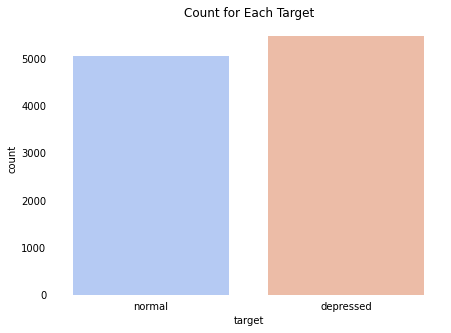

In [14]:
# count for each target
fig, ax = plt.subplots(figsize=(7, 5))
sns.countplot(x='target', data=df, palette='coolwarm').set(title='Count for Each Target')
# remove ticks line
ax.tick_params(left=False, bottom=False)
# remove frame
plt.box(False)

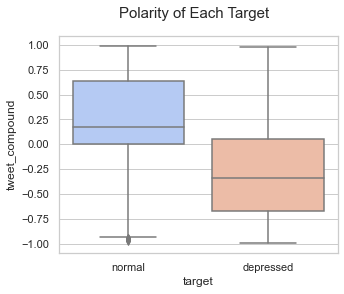

In [15]:
# polarity boxplot of each target
sns.set_theme(style="whitegrid")
plt.subplots(figsize=(5, 4))
sns.boxplot(x='target', y='tweet_compound', data=df, palette='coolwarm')
plt.rc('axes', titlesize=10, labelsize=10)
plt.suptitle('Polarity of Each Target', fontsize=15)
plt.show()

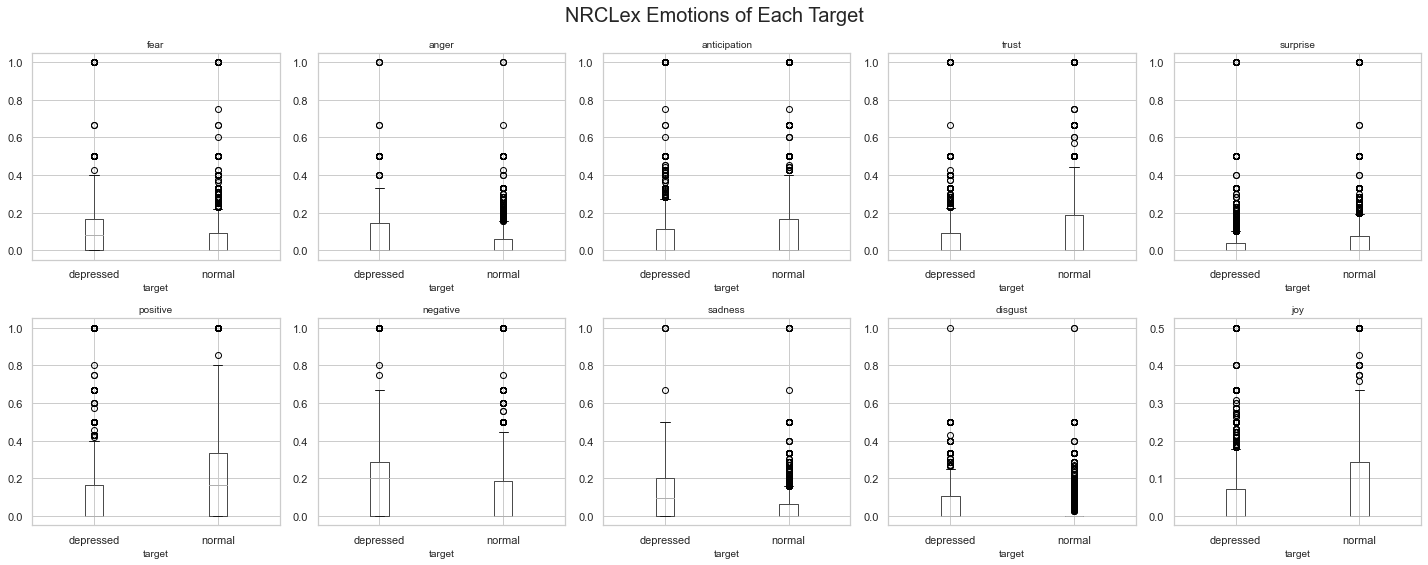

In [9]:
# nrclex boxplot of each target 
fig, ax = plt.subplots(2, 5, figsize=(20, 8))
df.boxplot(by='target', column='fear', ax=ax[0, 0])
df.boxplot(by='target', column='anger', ax=ax[0, 1])
df.boxplot(by='target', column='anticipation', ax=ax[0, 2])
df.boxplot(by='target', column='trust', ax=ax[0, 3])
df.boxplot(by='target', column='surprise', ax=ax[0, 4])
df.boxplot(by='target', column='positive', ax=ax[1, 0])
df.boxplot(by='target', column='negative', ax=ax[1, 1])
df.boxplot(by='target', column='sadness', ax=ax[1, 2])
df.boxplot(by='target', column='disgust', ax=ax[1, 3])
df.boxplot(by='target', column='joy', ax=ax[1, 4])
fig.suptitle('NRCLex Emotions of Each Target', fontsize=20)
plt.tight_layout()
plt.show()

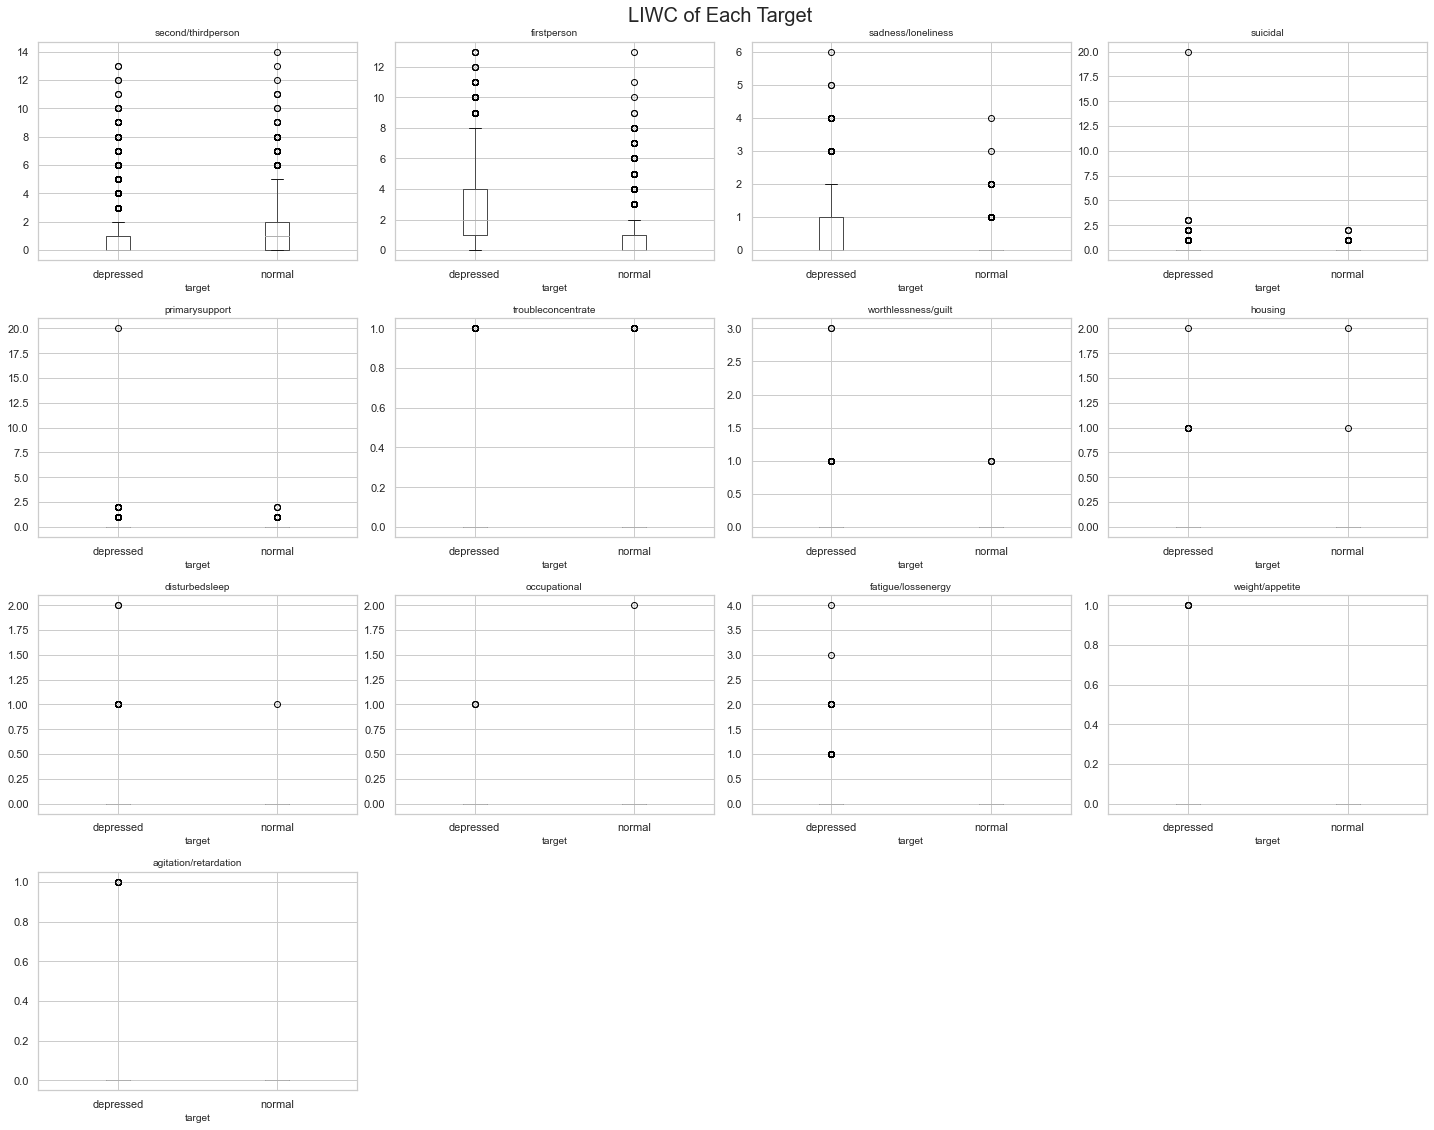

In [10]:
# liwc boxplot of each target 
fig, ax = plt.subplots(4, 4, figsize=(20, 16))
df.boxplot(by='target', column='second/thirdperson', ax=ax[0, 0])
df.boxplot(by='target', column='firstperson', ax=ax[0, 1])
df.boxplot(by='target', column='sadness/loneliness', ax=ax[0, 2])
df.boxplot(by='target', column='suicidal', ax=ax[0, 3])
df.boxplot(by='target', column='primarysupport', ax=ax[1, 0])
df.boxplot(by='target', column='troubleconcentrate', ax=ax[1, 1])
df.boxplot(by='target', column='worthlessness/guilt', ax=ax[1, 2])
df.boxplot(by='target', column='housing', ax=ax[1, 3])
df.boxplot(by='target', column='disturbedsleep', ax=ax[2, 0])
df.boxplot(by='target', column='occupational', ax=ax[2, 1])
df.boxplot(by='target', column='fatigue/lossenergy', ax=ax[2, 2])
df.boxplot(by='target', column='weight/appetite', ax=ax[2, 3])
df.boxplot(by='target', column='agitation/retardation', ax=ax[3, 0])
fig.delaxes(ax[3][1])
fig.delaxes(ax[3][2])
fig.delaxes(ax[3][3])
fig.suptitle('LIWC of Each Target', fontsize=20)
plt.tight_layout()
plt.show()

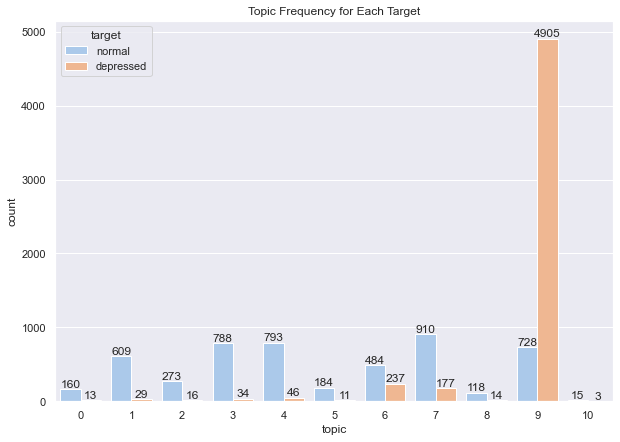

In [11]:
# topic frequency for each target
sns.set_theme(style='darkgrid')

fig, ax = plt.subplots(figsize=(10, 7))
graph = sns.countplot(data=df, x='topic', hue='target', palette='pastel').set_title('Topic Frequency for Each Target')

for container in ax.containers:
    ax.bar_label(container)
    
plt.show()

C:\Users\lvlip\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


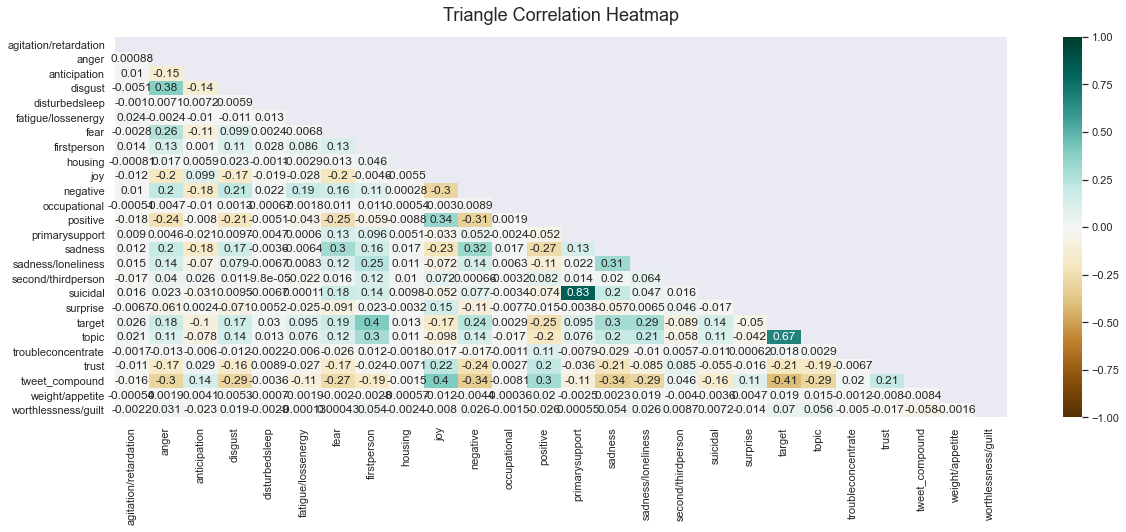

In [12]:
# triangle correlation heatmap 
# extract necessary columns
df_corr = df[df.columns.difference(['username', 'datetime', 'tweet', 'cleaned_tweet'])]
df_corr.loc[:, 'target'] = df_corr.loc[:, 'target'].replace(['normal', 'depressed'], [0, 1]) 

# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df_corr.corr(), dtype=bool))

fig, ax = plt.subplots(figsize=(20, 7))
sns.heatmap(df_corr.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.title('Triangle Correlation Heatmap', fontsize=18, pad=16)
plt.show()

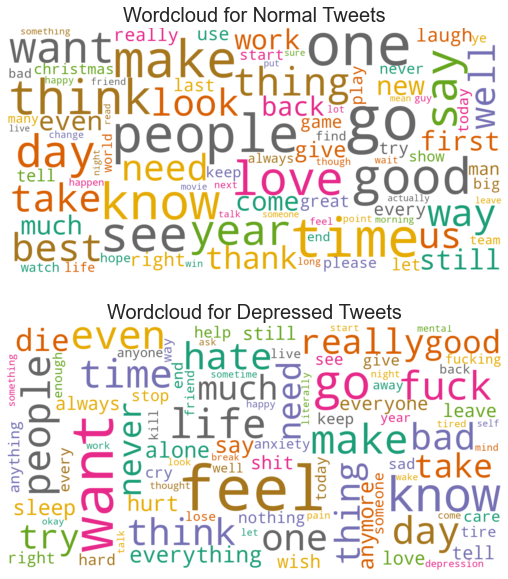

In [13]:
# wordcloud visualization for normal and depressed
tweet_normal = df[df['target']=='normal']
tweet_depressed = df[df['target']=='depressed']
tweet_normal = " ".join(tweet for tweet in tweet_normal.cleaned_tweet)
tweet_depressed = " ".join(tweet for tweet in tweet_depressed.cleaned_tweet)

fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# create and generate a word cloud image
# set collocations to false to ensure that the word cloud doesn’t contain any bigrams or duplicate words
wordcloud_normal = WordCloud(width=1600, height=800, max_font_size=200, max_words=90, colormap='Dark2', collocations = False, 
                             background_color="white").generate(tweet_normal)
wordcloud_depressed = WordCloud(width=1600, height=800, max_font_size=200, max_words=90, colormap='Dark2', collocations = False, 
                             background_color="white").generate(tweet_depressed)

# display the generated image
ax[0].imshow(wordcloud_normal, interpolation='bilinear')
ax[0].set_title('Wordcloud for Normal Tweets', fontsize=20)
ax[0].axis('off')
ax[1].imshow(wordcloud_depressed, interpolation='bilinear')
ax[1].set_title('Wordcloud for Depressed Tweets',fontsize=20)
ax[1].axis('off')
plt.show()

In [14]:
polarity_normal = pd.DataFrame(df.groupby('tweet')['tweet_compound'].mean().sort_values(ascending=True)).tail(10).iloc[::-1]
polarity_normal

,tweet_compound
tweet,
"Good morning: The sun is not shining today, but in a quest to find the beauty in all things ~ a thread of this mornings found beauty. I hope you like it as I enjoy sharing it with you Have a wonderful day- you are loved beyond measure ?? This morning from 7:00am to now https://t.co/wlpexPfIfW",0.9913
"@metacritic Dude! This is so so hugely amazing!! I hope every single ONCE realize the fact they the music taste they stan is literally the most excellent quality you can have!! I feel so glad that I own ""Formula of Love"" masterpiece myself ^^ Thanks metacritic team , you gave true justice ?",0.9887
"i know birthdays are arbitrary &amp; time is a construct &amp; all that jazz, but even so todays been full of reflection &amp; gratitude. i am really, truly, so thankful for you all. &amp; to balance out the snappiness, please enjoy my new Gay Judgment? crewneck. shes perfect. https://t.co/JXi9MjzBR9",0.9850
"ILHOON IS LOVED ILHOON IS BRAVE ILHOON IS AMAZING ILHOON IS PRECIOUS ILHOON IS APPRECIATED ILHOON IS NOT ALONE, BECAUSE WE ARE FOR HIM ALWAYS WE'LL ALWAYS BE BY ILHOON SIDE WELCOME HOME ILHOON #EternalLoveForIlhoon @BTOB_ILL",0.9831
"+ looking forward to all of them next year!! &lt;3 you're doing amazing my love. wishing you all the best this coming 2022, more acting and singing projects to come!! and i also wish you happiness and good health. i love you so much!!",0.9829
"One day it will be my turn, but I don't think it will ever happen. Even if I wait for everyone else to be happy, I still don't think I will ever be happy. Maybe I am just supposed to watch everyone else find people they love and that love them. While I watch and wish it could me",0.9822
"@Dverxs @dallasmavs @Chime Yo gg bro yall did pretty damn good to keep it that close, a few of those last Laker shots were pretty lucky lol especially that Russ one but was a great game tho! ?? Hope we somehow meet yall in the playoffs with Luka healthy cause thatll be a fun af series ????",0.9807
"I was already planning on ending the stream soon, but I prematurely ended and passed it onto @xGMercy If you don't follow him, please reconsider and show him some support and love! Super chill and super kind!",0.9794
is a very good &amp; strong project.i am very happy to be participating in this project.I hope this project gain mor popularity in the future and we all are make a good profit from this project @Mdnayan38284857 @SHShanto134 @UzzalDeb2,0.9782


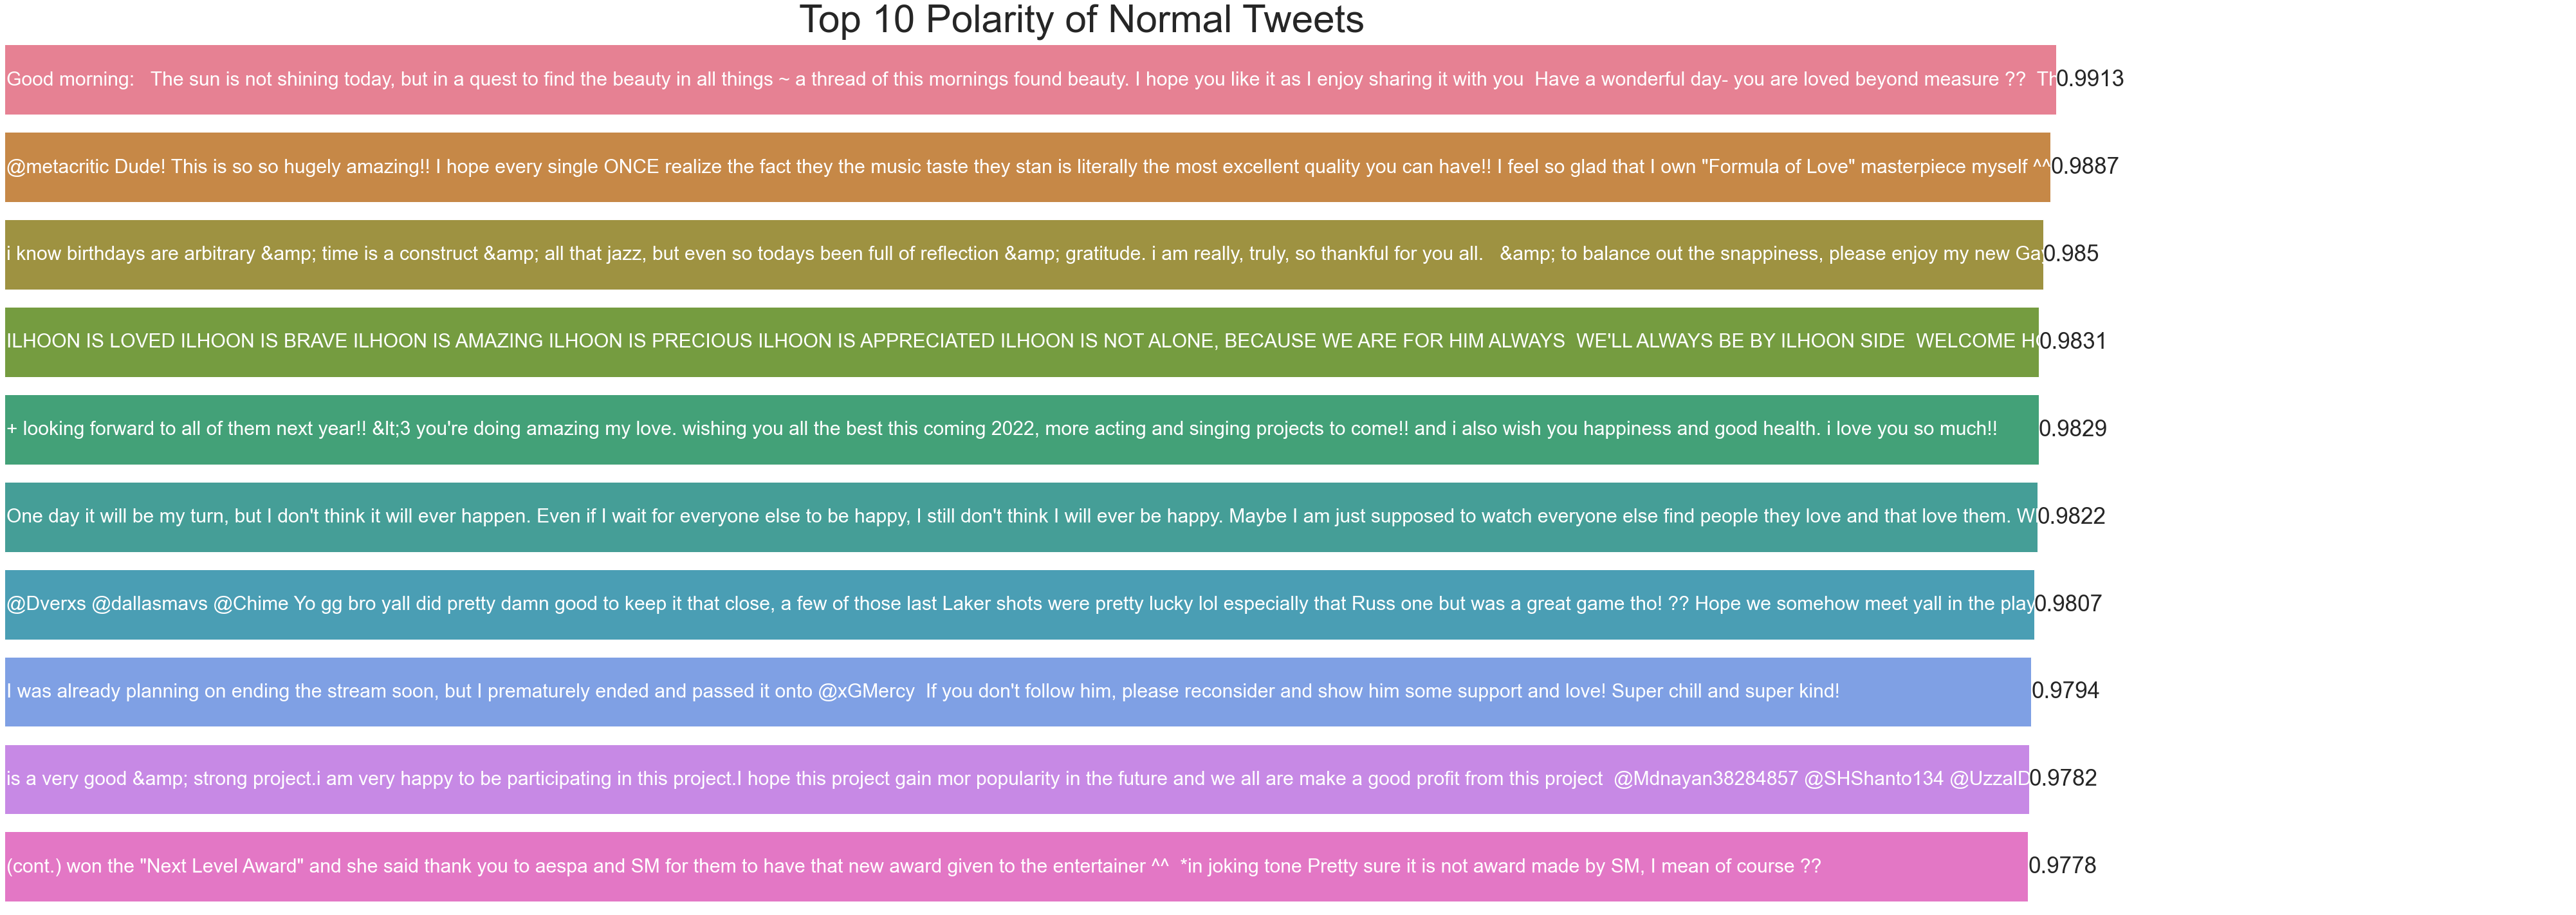

In [17]:
# polarity of normal tweets 
polarity_normal = pd.DataFrame(df.groupby('tweet')['tweet_compound'].mean().sort_values(ascending=True)).tail(10).iloc[::-1]
polarity_normal['tweet'] = polarity_normal.index

fig, ax = plt.subplots(figsize=(60, 25))
plt.title('Top 10 Polarity of Normal Tweets')
plt.rc('axes', titlesize=80, labelsize=60)
sns.barplot(y='tweet', x='tweet_compound', data=polarity_normal, palette='husl') 

# write tweets on bar
for bar, tweet in zip(ax.patches, polarity_normal['tweet']):
    ax.text(0.001, bar.get_y()+bar.get_height()/2, tweet, fontsize=30, ha='left', va='center', color='white')
    
# write polarity on graph
ax.bar_label(ax.containers[0], fontsize=35)

plt.axis('off')
plt.show()

In [16]:
polarity_depressed = pd.DataFrame(df.groupby('tweet')['tweet_compound'].mean().sort_values(ascending=True)).head(10)
polarity_depressed

,tweet_compound
tweet,
Die die die die die die die die die die die die die die die die die die die die My brain being nice to me. Seriously. Thats the nice end. Really really. It gets a lot worse.,-0.9977
I need a psychiatrist so bad but cant afford one since my pos husband got fired! I hate him so bad. We had bad ass insurance and now nothing. He has caused so much pain and misery! I need #help #mentalhealth #MentalHealthAwareness #mentalillness #MentalHealthMatters,-0.9894
"Im just a disgusting waste of oxygen thieving, toxic shit Cunt. I dont want to BE HERE ANYMORE FUCKING LET ME FUCKING GO WHY AM I SUCH A FUCKING PUSSY AND FAILURE I FRUCJING JUST WANT TO DIE WHY CANT I FUCKING DIE PLEAEE SOMEONE FUCJING JUST KILL ME. PLEASE!!!!!!!!!!!!!!!!!!!!!!",-0.9882
@icastleinthesky @BipolarClubDx Deep down I know its an accomplishment but it sucks bcus the stupid negative thoughts are just so dominating. But yes the cold makes my body physically hurt so bad (I have musculoskeletal problems since birth) &amp; the physical pain takes such a toll on me emotionally &amp; mentally ??,-0.9882
what the fuck do i do fucking helll dkjasdkajdldjksadjkla i fucking hate this i hate this i hate this i hate this my whole body is crawling i fucking hate this i dont know why this makes me so uncomfy and its sending me into ptsd mode jdjsaldjaldj what the fuck man what the fuck,-0.9855
"Dear Allah, i wanna die but i am too scared cause all i know u want to punish me in the hell. This is so stressful Allah. I hate u and ur religion.",-0.9840
@swvaliberal Nobody bullies me now since I left my hometown but before it used to be so bad. Especially high school. Made me suicidal for years. I still suffer from the long standing effects even at my big age. People are just so cruel. The words dont leave my head at times. Will take time,-0.9814
I am sorry dik. I am losing this battle. I am sorry if my death will make u suicidal. I am too sad. I cant face it anymore. These voices in my head are so loud. I am too sad and i really hate my life myself.,-0.9771
"He has caused my anger to worsen, my anxiety to worsen deeply, has caused my BPD, my depression, no telling what else I could be dx with honestly. Also believe I have PTSD. I need to see a psychiatrist so bad. But weve lost our insurance cuz of him. #help #mentalillness",-0.9769


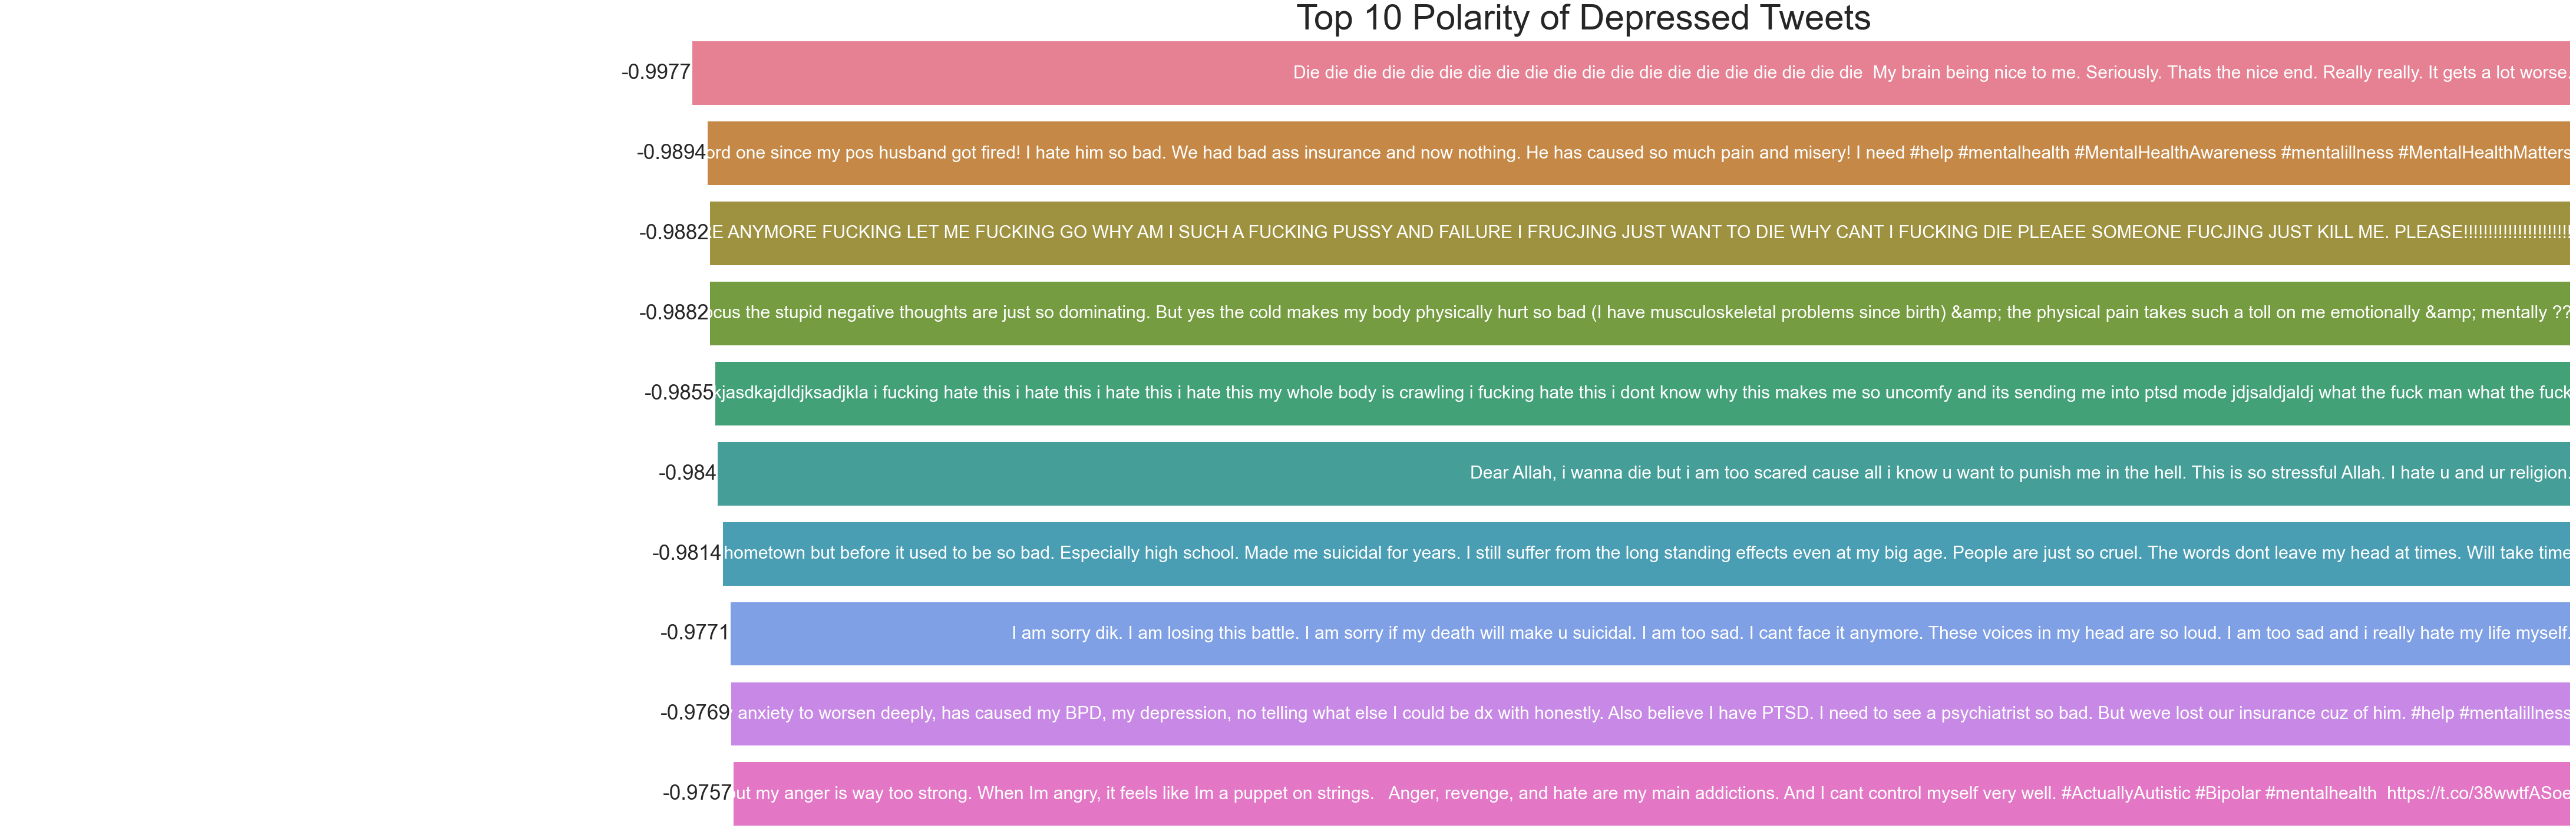

In [17]:
# polarity of depressed tweets 
polarity_depressed = pd.DataFrame(df.groupby('tweet')['tweet_compound'].mean().sort_values(ascending=True)).head(10)
polarity_depressed['tweet'] = polarity_depressed.index

fig, ax = plt.subplots(figsize=(60, 25))
plt.title('Top 10 Polarity of Depressed Tweets')
plt.rc('axes', titlesize=60, labelsize=60)
sns.barplot(y='tweet', x='tweet_compound', data=polarity_depressed, palette='husl') 

# write tweets on bar
for bar, tweet in zip(ax.patches, polarity_depressed['tweet']):
    ax.text(0.001, bar.get_y()+bar.get_height()/2, tweet, fontsize=30, ha='right', va='center', color='white')

# write polarity on graph
ax.bar_label(ax.containers[0], fontsize=35)

plt.axis('off')
plt.show()

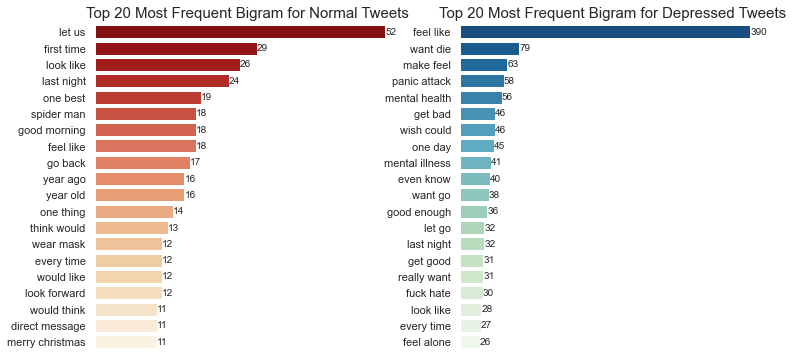

In [18]:
# most frequent bigram for normal & depressed tweets
# define stopwords
stop_words = set(stopwords.words('english'))
# remove stopwords
filter_normal = [x for x in tweet_normal.split(' ') if x not in stop_words]
filter_depressed = [x for x in tweet_depressed.split(' ') if x not in stop_words]

# calculate bigrams
bigrams_normal = zip(filter_normal, filter_normal[1:])
bigrams_depressed = zip(filter_depressed, filter_depressed[1:])

# count 10 most common bigrams
counts_normal = Counter(bigrams_normal).most_common(20)
counts_depressed = Counter(bigrams_depressed).most_common(20)

# separate bigram and count
bg_n, count_n = map(list,zip(*counts_normal))
bg_d, count_d = map(list,zip(*counts_depressed))

# join bigram string
bg_n_str = list(map(lambda x: ' '.join(x), bg_n))
bg_d_str = list(map(lambda x: ' '.join(x), bg_d))

# set plot
sns.set_style(style='white') 
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
plt.rc('axes', titlesize=15, labelsize=15)
sns.barplot(y=bg_n_str, x=count_n, palette='OrRd_r', ax=ax[0]).set_title('Top 20 Most Frequent Bigram for Normal Tweets')
sns.barplot(y=bg_d_str, x=count_d, palette='GnBu_r', ax=ax[1]).set_title('Top 20 Most Frequent Bigram for Depressed Tweets')

# remove frame
ax[0].set_frame_on(False)
ax[1].set_frame_on(False)

# write count on graph
ax[0].bar_label(ax[0].containers[0], fontsize=10)
ax[1].bar_label(ax[1].containers[0], fontsize=10)
    
# remove ticks in x axis
ax[0].set(xticklabels=[])
ax[1].set(xticklabels=[])
plt.show()

# Sentiment Over Time

In [19]:
patient = df[df['username']=='glossyxghost'].head(40)

patient.head()

,username,datetime,tweet,cleaned_tweet,target,tweet_compound,fear,anger,anticipation,trust,...,primarysupport,troubleconcentrate,worthlessness/guilt,housing,disturbedsleep,occupational,fatigue/lossenergy,weight/appetite,agitation/retardation,topic
8900,glossyxghost,30/12/2021 9:20,Im so cynical rn and in physical pain i fuckin...,i cynical right physical pain i fuck hate world,depressed,-0.8803,0.250000,0.1250,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
8901,glossyxghost,30/12/2021 4:07,stress makes me want to die i cant take it at ...,stress make me want die i not take it i start ...,depressed,-0.8466,0.166667,0.0000,0.166667,0.083333,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
8902,glossyxghost,29/12/2021 11:36,isolation tastes the sweetest,isolation taste sweetest,depressed,-0.4019,0.000000,0.0000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
8903,glossyxghost,29/12/2021 10:45,"i have struggled to fit in my entire life, alw...",i struggle fit my entire life always feel i ex...,depressed,0.3734,0.187500,0.1875,0.000000,0.062500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
8904,glossyxghost,29/12/2021 10:35,was pissed now im crying cant wait to turn num...,piss i cry not wait turn numb soon,depressed,-0.8658,0.000000,0.0000,0.200000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


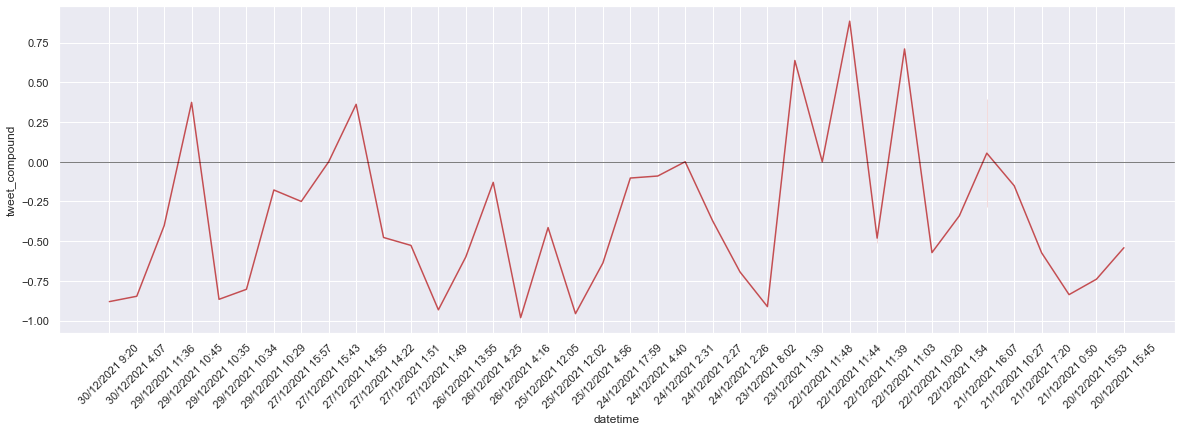

In [20]:
sns.set_theme(style="darkgrid")

plt.subplots(figsize=(20, 6))
timeline = sns.lineplot(x=patient['datetime'], y=patient['tweet_compound'], color='r')

plt.setp(timeline.get_xticklabels(), rotation=45)
timeline.axhline(0, linewidth=0.5, color='black')

plt.show()

# Positive & Negative Word Cloud

In [21]:
# create corpus from cleaned_tweet
patient_tweet = patient['cleaned_tweet']
join_tweet = ' '.join(x for x in patient_tweet)

# remove stopwords
filter_tweet = [x for x in join_tweet.split(' ') if x not in stop_words]

# get sentiment score for each word
analyzer = SentimentIntensityAnalyzer()
polarity = [analyzer.polarity_scores(x)['compound'] for x in filter_tweet]

# assign positive and negative word
pos_word = []
neg_word = []

for x in range (len(polarity)):
    if polarity[x] >= 0:
        pos_word.append(filter_tweet[x])
    else:
        neg_word.append(filter_tweet[x])
        
# join word in pos_word & neg_word
pos_word = ' '.join(x for x in pos_word)
neg_word = ' '.join(x for x in neg_word)

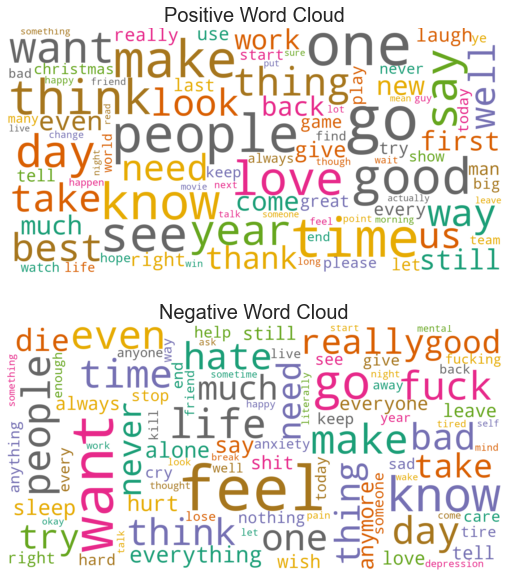

In [22]:
fig, ax = plt.subplots(2, 1, figsize=(20, 10))

# create and generate a word cloud image
# set collocations to false to ensure that the word cloud doesn’t contain any bigrams or duplicate words
wordcloud_pos = WordCloud(width=1600, height=800, max_font_size=200, max_words=50, colormap='Dark2', collocations = False, 
                             background_color="white").generate(pos_word)
wordcloud_neg = WordCloud(width=1600, height=800, max_font_size=200, max_words=50, colormap='Dark2', collocations = False, 
                             background_color="white").generate(neg_word)

# display the generated image
ax[0].imshow(wordcloud_normal, interpolation='bilinear')
ax[0].set_title('Positive Word Cloud', fontsize=20)
ax[0].axis('off')
ax[1].imshow(wordcloud_depressed, interpolation='bilinear')
ax[1].set_title('Negative Word Cloud',fontsize=20)
ax[1].axis('off')
plt.show()